In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.options.display.max_columns = None

In [8]:
data_test = pd.read_csv("./all/test.csv")
data = pd.read_csv("./all/train.csv")
data = pd.concat([data_test, data])

In [3]:
data.shape

(2919, 81)

In [4]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,NaN,2,1Fam,TA,No,468.0,144.0,Rec,LwQ,0.0,0.0,TA,270.0,Y,Feedr,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,MnPrv,NaN,0,CBlock,1,Typ,730.0,1.0,TA,Unf,TA,Attchd,1961.0,896,0,GasA,TA,1Story,1461,1,TA,Lvl,Gtl,11622,Inside,80.0,Reg,0,20,RH,0.0,None,NaN,0,6,NAmes,0,6,5,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,120,Pave,5,882.0,AllPub,140,1961,1961,2010
1,1329,0,0,NaN,3,1Fam,TA,No,923.0,0.0,ALQ,Unf,0.0,0.0,TA,406.0,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Typ,312.0,1.0,TA,Unf,TA,Attchd,1958.0,1329,1,GasA,TA,1Story,1462,1,Gd,Lvl,Gtl,14267,Corner,81.0,IR1,0,20,RL,108.0,BrkFace,Gar2,12500,6,NAmes,36,6,6,Y,0,NaN,CompShg,Hip,Normal,NaN,WD,0,Pave,6,1329.0,AllPub,393,1958,1958,2010
2,928,701,0,NaN,3,1Fam,TA,No,791.0,0.0,GLQ,Unf,0.0,0.0,Gd,137.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,MnPrv,TA,1,PConc,2,Typ,482.0,2.0,TA,Fin,TA,Attchd,1997.0,1629,1,GasA,Gd,2Story,1463,1,TA,Lvl,Gtl,13830,Inside,74.0,IR1,0,60,RL,0.0,None,NaN,0,3,Gilbert,34,5,5,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,6,928.0,AllPub,212,1997,1998,2010
3,926,678,0,NaN,3,1Fam,TA,No,602.0,0.0,GLQ,Unf,0.0,0.0,TA,324.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,470.0,2.0,TA,Fin,TA,Attchd,1998.0,1604,1,GasA,Ex,2Story,1464,1,Gd,Lvl,Gtl,9978,Inside,78.0,IR1,0,60,RL,20.0,BrkFace,NaN,0,6,Gilbert,36,6,6,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,7,926.0,AllPub,360,1998,1998,2010
4,1280,0,0,NaN,2,TwnhsE,TA,No,263.0,0.0,ALQ,Unf,0.0,0.0,Gd,1017.0,Y,Norm,Norm,SBrkr,0,TA,Gd,HdBoard,HdBoard,NaN,NaN,0,PConc,2,Typ,506.0,2.0,TA,RFn,TA,Attchd,1992.0,1280,0,GasA,Ex,1Story,1465,1,Gd,HLS,Gtl,5005,Inside,43.0,IR1,0,120,RL,0.0,None,NaN,0,1,StoneBr,82,5,8,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,144,Pave,5,1280.0,AllPub,0,1992,1992,2010


In [5]:
data.isnull().sum().sort_values(ascending=False).head(34)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
Exterior2nd        1
KitchenQual        1
Exterior1st        1
GarageCars         1
TotalBsmtSF        1
GarageArea         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64

In [10]:
values = {'PoolQC': 'noPool', 'MiscFeature': 'none', 'Alley': 'noAlley', 'Fence': 'noFence', 
          'FireplaceQu': 'noFireplace', 'GarageCond': 'noGarage', 'GarageType': 'noGarage', 'GarageYrBlt': 'noGarage',
          'GarageFinish': 'noGarage', 'GarageQual': 'noGarage', 'GarageCars': 0, 'GarageArea': 0,
          'BsmtExposure': 'noBasement',  'BsmtFinType2': 'noBasement', 'BsmtFinType1': 'noBasement',
          'BsmtCond': 'noBasement', 'BsmtQual': 'noBasement', 'BsmtFinSF2': 0, 'BsmtFinSF1': 0, 
          'BsmtUnfSF': 0, 'TotalBsmtSF': 0, 'BsmtFullBath': 0, 'BsmtHalfBath': 0, 'MasVnrArea': 0, 'MasVnrType': 'None'}

data = data.fillna(value=values)

cat_to_imputation = ['Exterior1st', 'Exterior2nd', 'MSZoning', 'SaleType', 'KitchenQual', 
                     'Functional', 'Utilities', 'Electrical','MasVnrType']

for col in cat_to_imputation:
    data[col] = data[col].fillna(data[col].value_counts().index[0])


In [7]:
data.isnull().sum().sort_values(ascending=False).head(10)

SalePrice      1459
LotFrontage     486
Foundation        0
ExterCond         0
ExterQual         0
Exterior1st       0
Exterior2nd       0
Fence             0
FireplaceQu       0
Fireplaces        0
dtype: int64

In [9]:
data[data['MasVnrType'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
231,878,1126,0,NaN,4,1Fam,TA,No,651.0,0.0,GLQ,Unf,1.0,0.0,Ex,219.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,644.0,3.0,TA,Fin,TA,BuiltIn,2002.0,2004,1,GasA,Ex,2Story,1692,1,Gd,Lvl,Gtl,12891,Corner,NaN,IR1,0,60,RL,NaN,NaN,NaN,0,7,Gilbert,48,5,8,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,8,870.0,AllPub,0,2002,2002,2009
246,1436,0,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Ex,1436.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,529.0,2.0,TA,Fin,TA,Attchd,2008.0,1436,0,GasA,Ex,1Story,1707,1,Gd,Lvl,Gtl,7993,Inside,90.0,IR1,0,20,FV,NaN,NaN,NaN,0,10,Somerst,121,5,7,Y,0,NaN,CompShg,Gable,Partial,NaN,New,0,Pave,6,1436.0,AllPub,0,2008,2009,2009
422,840,885,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,840.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,550.0,2.0,TA,RFn,TA,Attchd,2002.0,1725,1,GasA,Ex,2Story,1883,1,Gd,Lvl,Gtl,8749,Inside,70.0,Reg,0,60,RL,NaN,NaN,NaN,0,11,CollgCr,48,5,7,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,6,840.0,AllPub,0,2002,2002,2009
532,707,707,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,707.0,Y,RRAn,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,403.0,2.0,TA,Fin,TA,Attchd,2002.0,1414,1,GasA,Ex,2Story,1993,1,Gd,Lvl,Gtl,7750,Inside,NaN,Reg,0,60,RL,NaN,NaN,NaN,0,4,Gilbert,35,5,7,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,6,707.0,AllPub,100,2002,2002,2008
544,1460,0,0,NaN,3,1Fam,TA,No,666.0,0.0,GLQ,Unf,0.0,0.0,Ex,794.0,Y,Feedr,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,480.0,2.0,TA,Fin,TA,Attchd,2006.0,1460,0,GasA,Ex,1Story,2005,1,Gd,Lvl,Gtl,10037,Corner,87.0,Reg,0,20,RL,NaN,NaN,NaN,0,8,Somerst,20,5,8,Y,0,NaN,CompShg,Hip,Normal,NaN,WD,0,Pave,6,1460.0,AllPub,0,2006,2007,2008
581,952,860,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,952.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,469.0,2.0,TA,RFn,TA,Attchd,2002.0,1812,1,GasA,Ex,2Story,2042,1,TA,Lvl,Gtl,7500,Inside,NaN,Reg,0,60,FV,NaN,NaN,NaN,0,4,Somerst,112,5,7,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,7,952.0,AllPub,144,2002,2002,2008
851,768,728,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,768.0,Y,RRAn,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,CBlock,3,Typ,572.0,2.0,TA,Unf,TA,Attchd,2007.0,1496,0,GasA,Ex,2Story,2312,1,Gd,Lvl,Gtl,15810,Inside,59.0,IR1,0,60,RL,NaN,NaN,NaN,0,5,Gilbert,0,5,6,Y,0,NaN,CompShg,Gable,Partial,NaN,New,0,Pave,7,768.0,AllPub,100,2007,2007,2007
865,754,640,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,384.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2003.0,1394,1,GasA,Ex,SLvl,2326,1,Gd,Lvl,Gtl,11950,Corner,NaN,IR1,0,80,RL,NaN,NaN,NaN,0,10,Gilbert,0,5,7,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,7,384.0,AllPub,100,2003,2003,2007
880,1528,0,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1528.0,Y,Feedr,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,3,Typ,480.0,2.0,TA,Unf,TA,Attchd,2007.0,1528,2,GasA,Ex,1Story,2341,1,Gd,Lvl,Gtl,9965,FR2,85.0,Reg,0,20,RL,NaN,NaN,NaN,0,9,Somerst,228,5,7,Y,0,NaN,CompShg,Gable,Partial,NaN,New,0,Pave,6,1528.0,AllPub,0,2007,2007,2007
889,955,925,0,NaN,3,1Fam,TA,Av,745.0,0.0,GLQ,Unf,1.0,0.0,Ex,210.0,Y,Norm,Norm,SBrkr,0,TA,Gd,Wd

In [79]:
data['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [106]:
data.groupby(["MasVnrType"])['Id'].count().reset_index().sort_values('Id', ascending=False)

,MasVnrType,Id
2,None,878
1,BrkFace,434
3,Stone,121
0,BrkCmn,10


In [39]:
# data.groupby(['MSSubClass', 'Electrical'])['Id'].count().reset_index()

In [22]:
data[data['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73,9735,Pave,noAlley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,noFireplace,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,noPool,noFence,none,0,5,2008,WD,Normal,167500


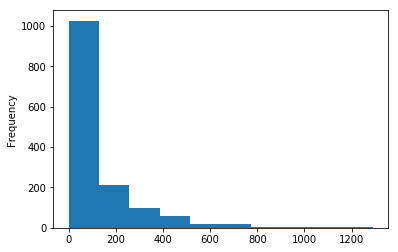

In [13]:
data["MasVnrArea"].plot(kind='hist')

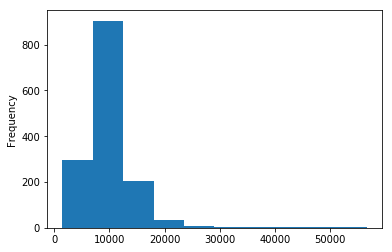

In [9]:
data["LotArea"].plot(kind='hist')

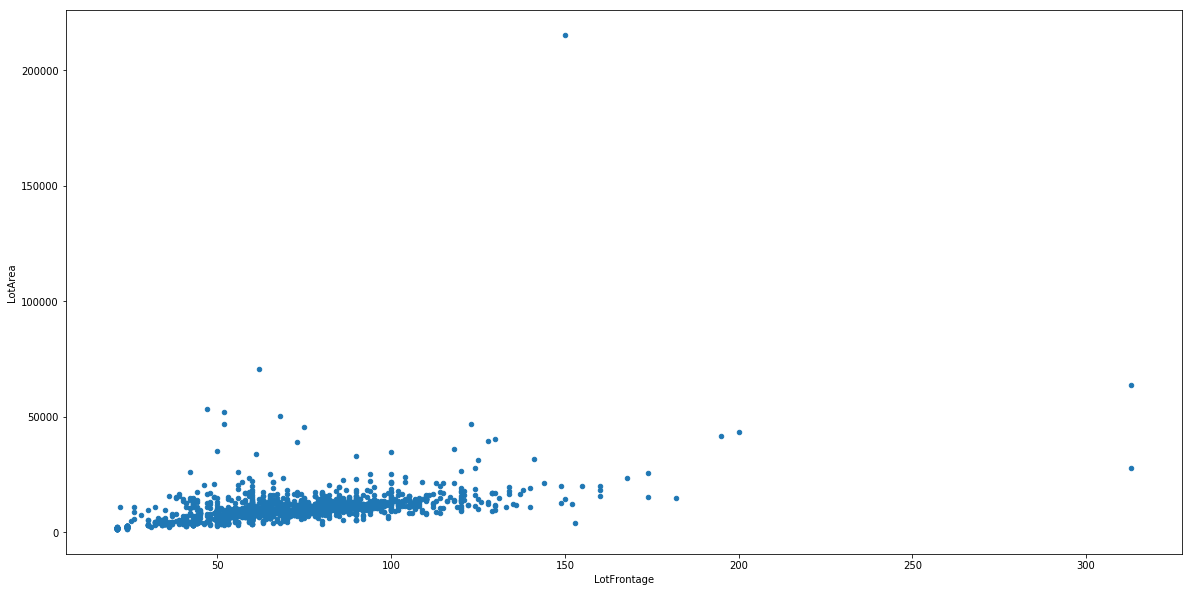

In [15]:

data[["LotFrontage", "LotArea"]].plot(x="LotFrontage", y="LotArea", kind='scatter', figsize=(20,10))

In [81]:
print(lotarea_mean)
print(lotarea_std)

10168.1140802
7886.99635911


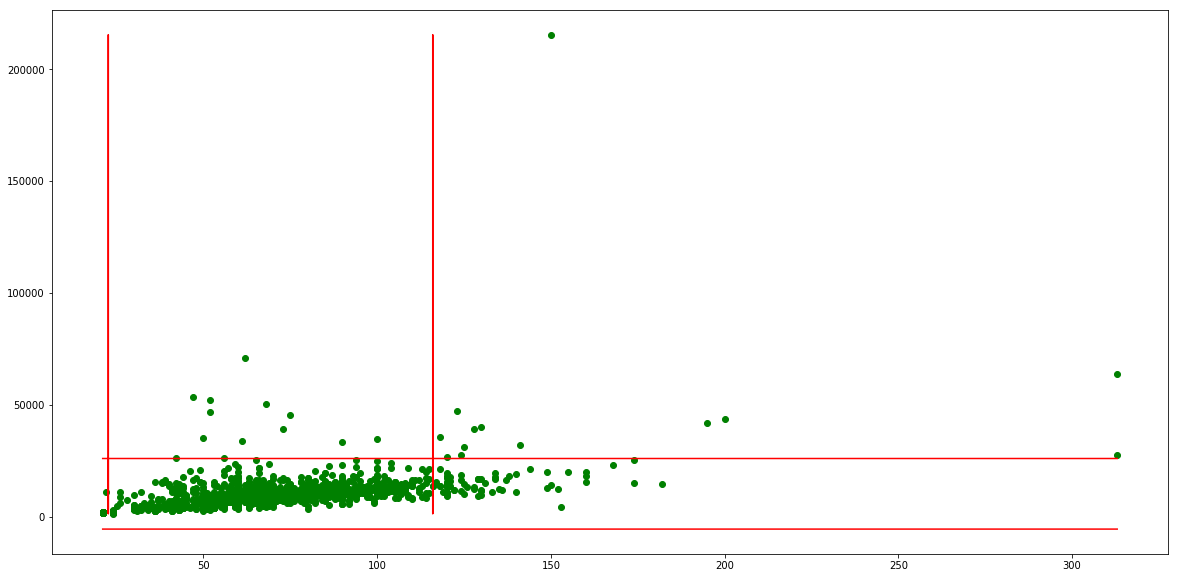

In [31]:
data = data.sort_values("LotFrontage")

lotfrontage_mean = data["LotFrontage"].mean()
lotfrontage_std = data["LotFrontage"].std()

lotarea_mean = data["LotArea"].mean()
lotarea_std = data["LotArea"].std()

plt.figure(figsize=(20,10))
plt.scatter(data["LotFrontage"], data["LotArea"], c='green')
plt.plot(data["LotFrontage"], [lotarea_mean + 2 * lotarea_std]*data["LotFrontage"].shape[0], c= "red")
plt.plot(data["LotFrontage"], [lotarea_mean - 2 * lotarea_std]*data["LotFrontage"].shape[0], c= "red")
plt.plot([lotfrontage_mean + 2 * lotfrontage_std]*data["LotFrontage"].shape[0], data["LotArea"], c= "red")
plt.plot([lotfrontage_mean - 2 * lotfrontage_std]*data["LotFrontage"].shape[0], data["LotArea"], c= "red")


In [144]:
model_data = data[["LotArea", "LotFrontage"]].dropna()
model_data = model_data[model_data["LotArea"] < lotarea_mean + 2 * lotarea_std]
model_data = model_data[model_data["LotFrontage"] > lotfrontage_mean - 2 * lotfrontage_std]
model_data = model_data[model_data["LotFrontage"] < lotfrontage_mean + 2 * lotfrontage_std]

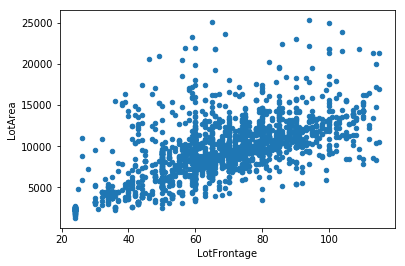

In [145]:
model_data.plot(x="LotFrontage", y="LotArea", kind='scatter')

In [146]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(model_data["LotArea"].values.reshape(-1,1), model_data["LotFrontage"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
model_data["front_pred"] = lr.predict(model_data["LotArea"].values.reshape(-1,1))
model_data.head()

,LotArea,LotFrontage,front_pred
1334,2368,24.0,45.072247
432,1920,24.0,43.595550
599,1950,24.0,43.694436
1182,2760,24.0,46.364357
39,2544,24.0,45.652378


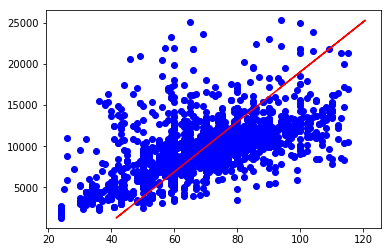

In [148]:

# model_data.sort_values("front_pred", ascending=False).head(20)
# plt.figure(figsize=(20,10))
plt.scatter(model_data["LotFrontage"], model_data["LotArea"], c="blue")
plt.plot(model_data["front_pred"], model_data["LotArea"] , c= "red")

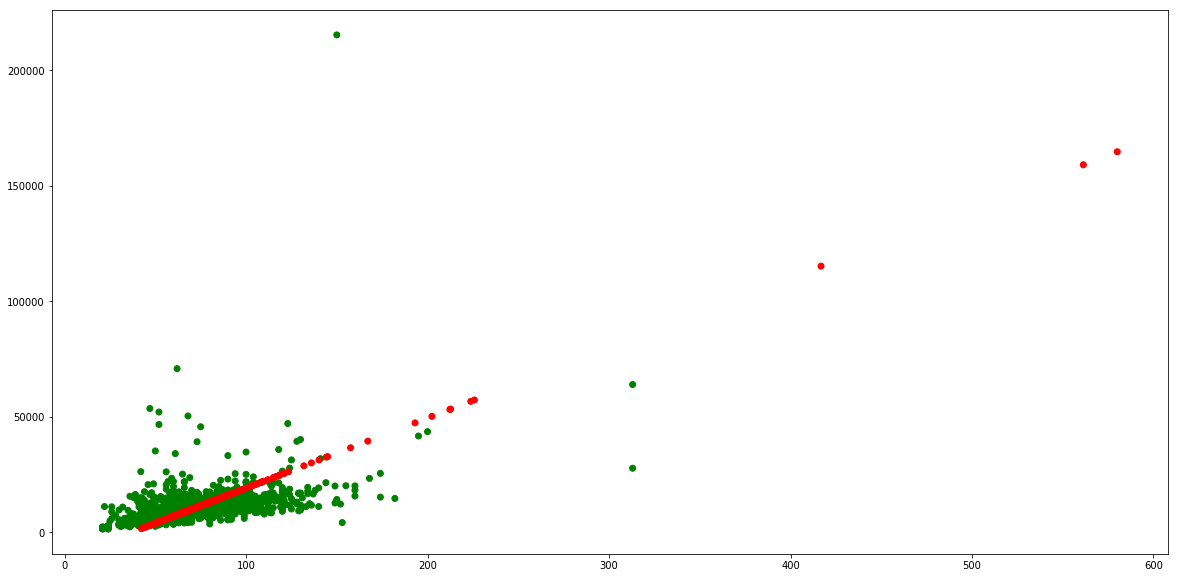

In [149]:
plot_data = data[["LotArea", "LotFrontage"]]
plot_data = plot_data.sort_values("LotFrontage")

plot_data["color"] = np.where(plot_data['LotFrontage'].isnull(), 'red', 'green')
# plot_data["color"] = np.where(data["LotArea"] >= lotarea_mean + (2 * lotarea_std), 'blue', plot_data["color"])

plot_data["front_pred"] = lr.predict(plot_data["LotArea"].values.reshape(-1,1))
plot_data["final_front"] = np.where(plot_data['LotFrontage'].isnull(), plot_data["front_pred"], plot_data["LotFrontage"])

plt.figure(figsize=(20,10))
plt.scatter(plot_data["final_front"], plot_data["LotArea"], c=plot_data["color"])
# plt.plot(plot_data["front_pred"], plot_data["LotArea"] , c= "red")

In [152]:
plot_data.sort_values("LotArea", ascending=False)

,LotArea,LotFrontage,color,front_pred,final_front
313,215245,150.0,green,746.757227,150.000000
335,164660,NaN,red,580.018995,580.018995
249,159000,NaN,red,561.362508,561.362508
706,115149,NaN,red,416.820880,416.820880
451,70761,62.0,green,270.509194,62.000000
1298,63887,313.0,green,247.851121,313.000000
1396,57200,NaN,red,225.809437,225.809437
790,56600,NaN,red,223.831718,223.831718
769,53504,47.0,green,213.626685,47.000000
457,53227,NaN,red,212.713638,212.713638
